# Malaria Detection Project

by Stuart Miller

Data was downloaded from [Kaggle](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria).

**Goal**: create a model that could be used to help humans identify cells infected with malaria.

## Import needed libraries

In [51]:
try:
    import glob
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split

    from PIL import Image
    %matplotlib inline

    import keras
    from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
    from keras.models import Sequential
    from keras.utils import to_categorical
except:
    print("Unable to import all needed libraries")

## Load Data

1. Get locations of downloaded data
2. Show a sample of each type of image
3. Read in data to list
    * images as np.arrays
    * labels as 0 - infected, 1 - uninfected

In [40]:
MAIN_DATA_PATH = '~/SDD1/data/cell_images/*'

# get image paths
uninfected_img = glob.glob(MAIN_DATA_PATH + 'Uninfected/*.png')
infected_img = glob.glob(MAIN_DATA_PATH + 'Parasitized/*.png')

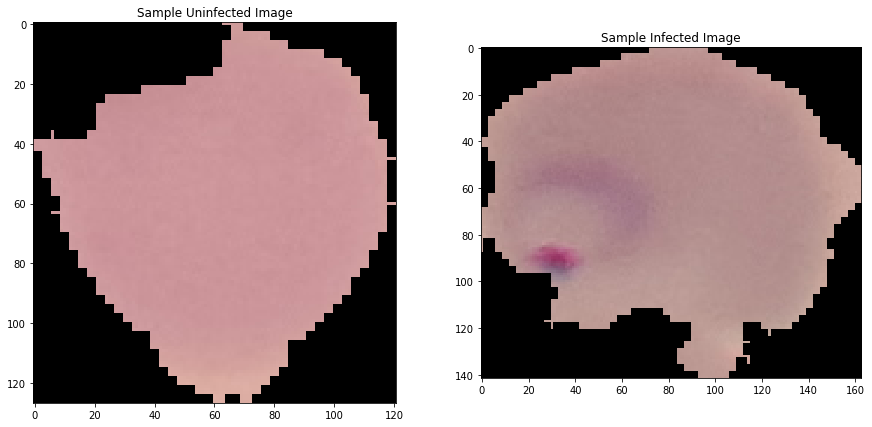

In [41]:
# visualize some sample images

fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(15, 7));

uninfected_image = Image.open(uninfected_img[5])
ax[0].imshow(uninfected_image);
ax[0].set_title('Sample Uninfected Image');
infected_image = Image.open(infected_img[5])
ax[1].imshow(infected_image);
ax[1].set_title('Sample Infected Image');

In [48]:
IM_SIZE = 128
images = list()
labels = list()

# read in the infected images
# label as 0
for im in infected_img:
    try:
        image = Image.open(im)
        image = image.resize((IM_SIZE,IM_SIZE))
        images.append(np.array(image))
        labels.append(0)
    except:
        print("could not open " + im)
        
# read in the uninfected images
# label as 1
for im in uninfected_img:
    try:
        image = Image.open(im)
        image = image.resize((IM_SIZE,IM_SIZE))
        images.append(np.array(image))
        labels.append(1)
    except:
        print("Could not open " + im)
print("Images have the following vector shape: {}, {}, {}".format(*images[0].shape))

Images have the following vector shape: 128 128 3


In [53]:
X_train, X_test, y_train, y_test = train_test_split(images, \
                                                    to_categorical(np.array(labels)), \
                                                    test_size = 0.25, random_state = 0)

In [55]:
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (IM_SIZE, IM_SIZE, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=2))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [56]:
history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 50, 
                         validation_split = 0.1,
                         shuffle = False)
                         
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(X_test), np.array(y_test))[1]*100))

Train on 18601 samples, validate on 2067 samples
Epoch 1/50
 - 16s - loss: 0.4747 - acc: 0.7758 - val_loss: 1.6065 - val_acc: 0.6333
Epoch 2/50
 - 15s - loss: 0.2211 - acc: 0.9205 - val_loss: 0.4593 - val_acc: 0.8307
Epoch 3/50
 - 15s - loss: 0.1833 - acc: 0.9322 - val_loss: 0.1966 - val_acc: 0.9274
Epoch 4/50
 - 15s - loss: 0.1556 - acc: 0.9381 - val_loss: 0.3323 - val_acc: 0.8824
Epoch 5/50
 - 15s - loss: 0.1455 - acc: 0.9433 - val_loss: 0.2153 - val_acc: 0.9260
Epoch 6/50
 - 15s - loss: 0.1282 - acc: 0.9469 - val_loss: 0.2625 - val_acc: 0.9187
Epoch 7/50
 - 15s - loss: 0.1115 - acc: 0.9543 - val_loss: 0.2884 - val_acc: 0.9129
Epoch 8/50
 - 15s - loss: 0.0958 - acc: 0.9583 - val_loss: 0.3055 - val_acc: 0.9105
Epoch 9/50
 - 15s - loss: 0.0857 - acc: 0.9626 - val_loss: 0.5448 - val_acc: 0.8728
Epoch 10/50
 - 15s - loss: 0.0725 - acc: 0.9662 - val_loss: 0.2534 - val_acc: 0.9299
Epoch 11/50
 - 15s - loss: 0.0614 - acc: 0.9712 - val_loss: 0.3710 - val_acc: 0.9221
Epoch 12/50
 - 15s - loss